## Noiseless case 

In [1]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import TGate
from qiskit.quantum_info import state_fidelity, Statevector, DensityMatrix
import numpy as np
from matplotlib import pyplot as plt

In [2]:
qc = QuantumCircuit(1)
np.random.seed(1)

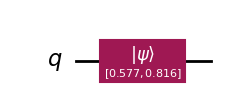

In [3]:
from math import sqrt
alpha=1/sqrt(3)
beta=sqrt(2)/sqrt(3)
qc.initialize([alpha, beta], 0)
qc.draw('mpl')

In [4]:
psi1=Statevector(qc)
psi1.draw('latex')

<IPython.core.display.Latex object>

In [5]:
rho= DensityMatrix(qc)
rho.draw('latex', prefix= "\\rho=")

<IPython.core.display.Latex object>

In [6]:
trace_den =np.trace(rho)
print(trace_den)

(1.0000000000000002+0j)


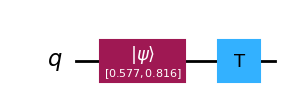

In [7]:
t_gate= TGate()
qc.append(t_gate, [0])
qc.draw('mpl')

In [8]:
psi2=Statevector(qc) # after passing through gate
psi2.draw('latex')

<IPython.core.display.Latex object>

In [9]:
rho_1= DensityMatrix(qc)
rho_1.draw('latex', prefix= "\\rho_1=")

<IPython.core.display.Latex object>

In [10]:
trace_den1 =np.trace(rho_1)
print(trace_den1)
fidelity= state_fidelity(rho,rho_1)
print(fidelity)

(1.0000000000000002+0j)
0.86982523608291


In [11]:
prob_0 = alpha**2
prob_1 = beta**2
print(prob_0)
print(prob_1)

0.3333333333333334
0.6666666666666669


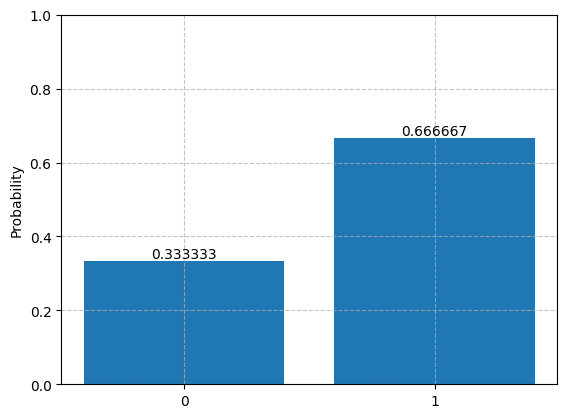

In [12]:
x_label = ['0', '1']
counts = [prob_0, prob_1]
fig, ax = plt.subplots()
bar_container = ax.bar(x_label, counts)
ax.set(ylabel='Probability', ylim=(0, 1))
ax.bar_label(bar_container)
plt.grid(True, linestyle='--', alpha=0.75)
plt.show()

In [13]:
# Probabaility after passing through noiseless gate
# Take diagonal elements of density matrix
density_matrix_array = rho_1.data
prob_0_gate = density_matrix_array[0,0] # after passing through gate 
prob_1_gate = density_matrix_array[1,1]
print(density_matrix_array)
print(prob_0_gate)
print(prob_1_gate)

[[0.33333333+0.j         0.33333333-0.33333333j]
 [0.33333333+0.33333333j 0.66666667+0.j        ]]
(0.3333333333333334+0j)
(0.6666666666666667+0j)


C:\Users\FJ03XV\PycharmProjects\Truncation_error\.venv\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\FJ03XV\PycharmProjects\Truncation_error\.venv\Lib\site-packages\matplotlib\transforms.py:767: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


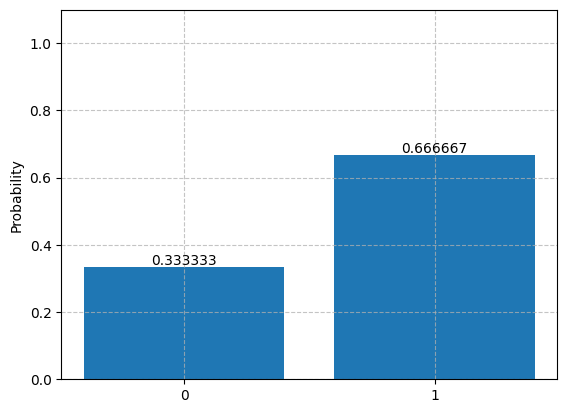

In [14]:
x_label = ['0', '1']
counts = [prob_0_gate, prob_1_gate]
fig, ax = plt.subplots()
bar_container = ax.bar(x_label, counts)
ax.set(ylabel='Probability', ylim=(0, 1.1))
ax.bar_label(bar_container)
plt.grid(True, linestyle='--', alpha=0.75)
plt.show()

## With Noise 

In [15]:
from scipy.linalg import sqrtm
prob_0_noisy=[]
prob_1_noisy=[]
prob_0_noisy_gate=[]
prob_1_noisy_gate=[]
fidelity_noisy=[]


In [16]:
def prob_calc(m,n):
    for i in range(1000):
        del_alpha= - np.random.normal(loc=0, scale=m)
        del_beta = - np.random.normal(loc=0, scale=n)
        if (np.abs(alpha+del_alpha))**2+ (np.abs(beta+del_beta))**2<=1:
            # print((np.abs(alpha+del_alpha))**2+ (np.abs(beta+del_beta))**2)
            matrix1 = np.array([[alpha+del_alpha],[beta+del_beta]])
            matrix2 = matrix1.conjugate().transpose()
            rho_delta = matrix1 @ matrix2    # density matrix
            prob_0_noisy.append(np.float64(rho_delta[0,0])) # before the gate 
            prob_1_noisy.append(np.float64(rho_delta[1,1]))
            U= np.array([[1, 0],[0, np.exp(1j * np.pi / 4)]]) # T matrix
            U_dag= U.conjugate().transpose()
            rho_delta_gate = U @ rho_delta @ U_dag
            prob_0_noisy_gate.append(np.float64(rho_delta_gate[0,0]))  # after the gate 
            prob_1_noisy_gate.append(np.float64(rho_delta_gate[1,1]))
            mat = sqrtm(sqrtm(rho_delta)@ rho_delta_gate @ sqrtm(rho_delta))
            mat= mat@mat
            fidelity_noisy.append(np.float64(np.trace(mat)))
    exp_prob_0_noisy= np.mean(prob_0_noisy) #\
    exp_prob_1_noisy= np.mean(prob_1_noisy)
    exp_prob_0_noisy_gate= np.mean(prob_0_noisy_gate)
    exp_prob_1_noisy_gate= np.mean(prob_1_noisy_gate)
    exp_fidelity_noisy = np.mean(fidelity_noisy)
    return exp_prob_0_noisy, exp_prob_1_noisy, exp_prob_0_noisy_gate, exp_prob_1_noisy_gate, exp_fidelity_noisy
            

In [17]:
# exp_prob_0_noisy, exp_prob_1_noisy, exp_prob_0_noisy_gate, exp_prob_1_noisy_gate, exp_fidelity_noisy = prob_calc(0.05,0.05)
# print(exp_prob_0_noisy)
# print(exp_prob_1_noisy)
# print(exp_prob_0_noisy_gate)
# print(exp_prob_1_noisy_gate) 
# print(exp_fidelity_noisy)


In [18]:
sigma_alpha=np.linspace(0.01,0.1,11)
sigma_beta=np.linspace(0.01,0.1,len(sigma_alpha))
exp_prob_0_noisy=np.empty((len(sigma_alpha), len(sigma_alpha)))
exp_prob_1_noisy=np.empty((len(sigma_alpha), len(sigma_alpha)))
exp_prob_0_noisy_gate=np.empty((len(sigma_alpha), len(sigma_alpha)))
exp_prob_1_noisy_gate=np.empty((len(sigma_alpha), len(sigma_alpha)))
exp_fidelity_noisy=np.empty((len(sigma_alpha), len(sigma_alpha)))

i=0

for m in sigma_alpha:    
    j=0
    for n in sigma_beta:        
        exp_prob_0_noisy[i,j], exp_prob_1_noisy[i,j], exp_prob_0_noisy_gate[i,j], exp_prob_1_noisy_gate[i,j], exp_fidelity_noisy[i,j]=prob_calc(m,n)
        j=j+1
        # print(j)
    i=i+1
    # print(i)
        

C:\Users\FJ03XV\AppData\Local\Temp\ipykernel_9624\1805504769.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  prob_0_noisy_gate.append(np.float64(rho_delta_gate[0,0]))  # after the gate
C:\Users\FJ03XV\AppData\Local\Temp\ipykernel_9624\1805504769.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  prob_1_noisy_gate.append(np.float64(rho_delta_gate[1,1]))
C:\Users\FJ03XV\AppData\Local\Temp\ipykernel_9624\1805504769.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
  fidelity_noisy.append(np.float64(np.trace(mat)))


In [19]:
# print(exp_prob_0_noisy)
# print(exp_prob_1_noisy)
# print(exp_prob_0_noisy_gate)
# print(exp_prob_1_noisy_gate) 
# print(exp_fidelity_noisy)

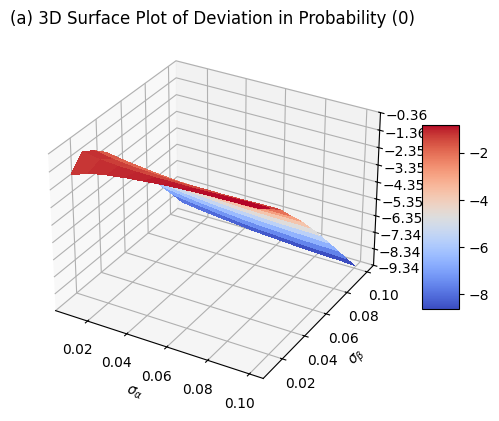

In [20]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cm
from matplotlib.ticker import LinearLocator

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = sigma_alpha
Y = sigma_beta
X, Y = np.meshgrid(X, Y)
Z1 = 100*(exp_prob_0_noisy-prob_0)/prob_0
# Plot the surface.
surf = ax.plot_surface(X, Y, Z1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
# ax.set_zlim(0, 1)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel(r'$\sigma_{\alpha}$')
ax.set_ylabel(r'$\sigma_{\beta}$')
ax.set_zlabel(r'$\text{Probability}$') 
ax.set_title('(a) 3D Surface Plot of Deviation in Probability (0)')

plt.show()

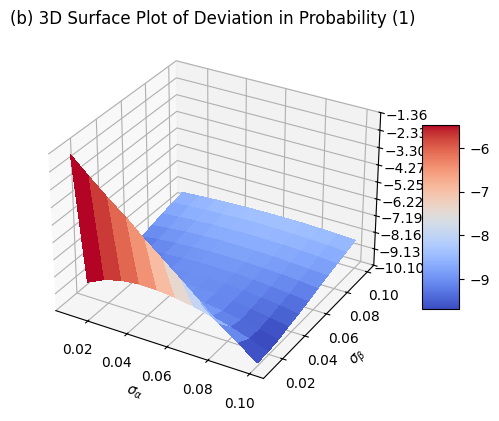

In [21]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = sigma_alpha
Y = sigma_beta
X, Y = np.meshgrid(X, Y)
Z2 = 100*(exp_prob_1_noisy-prob_1)/prob_1

# Plot the surface.
surf = ax.plot_surface(X, Y, Z2, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
# ax.set_zlim(0, 1)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel(r'$\sigma_{\alpha}$')
ax.set_ylabel(r'$\sigma_{\beta}$')
ax.set_zlabel(r'$\text{Probability}$') 
ax.set_title('(b) 3D Surface Plot of Deviation in Probability (1)')

plt.show()

C:\Users\FJ03XV\PycharmProjects\Truncation_error\.venv\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


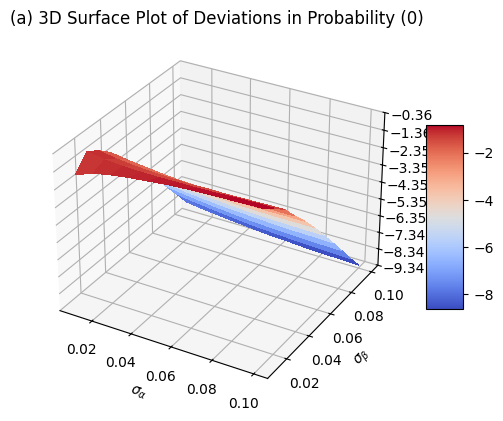

In [22]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = sigma_alpha
Y = sigma_beta
X, Y = np.meshgrid(X, Y)
Z3 = 100*(exp_prob_0_noisy_gate-prob_0_gate)/prob_0_gate

# Plot the surface.
surf = ax.plot_surface(X, Y, Z3, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
# ax.set_zlim(0, 1)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel(r'$\sigma_{\alpha}$')
ax.set_ylabel(r'$\sigma_{\beta}$')
ax.set_zlabel(r'$\text{Probability}$') 
ax.set_title('(a) 3D Surface Plot of Deviations in Probability (0)')

plt.show()

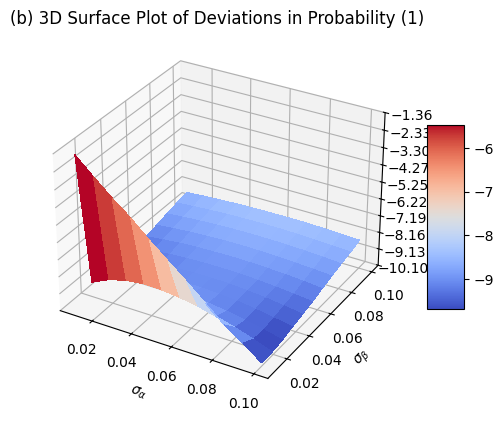

In [23]:

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = sigma_alpha
Y = sigma_beta
X, Y = np.meshgrid(X, Y)
Z4 = 100*(exp_prob_1_noisy_gate-prob_1_gate)/prob_1_gate

# Plot the surface.
surf = ax.plot_surface(X, Y, Z4, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
# ax.set_zlim(0, 1)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel(r'$\sigma_{\alpha}$')
ax.set_ylabel(r'$\sigma_{\beta}$')
ax.set_zlabel(r'$\text{Probability}$') 
ax.set_title('(b) 3D Surface Plot of Deviations in Probability (1)')

plt.show()

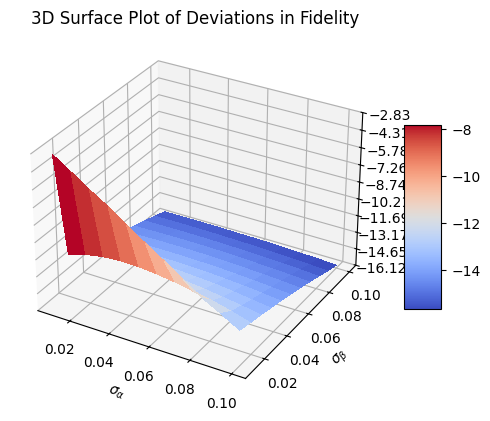

In [24]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = sigma_alpha
Y = sigma_beta
X, Y = np.meshgrid(X, Y)
Z5 = 100*(exp_fidelity_noisy- fidelity)/fidelity

# Plot the surface.
surf = ax.plot_surface(X, Y, Z5, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
# ax.set_zlim(0, 1)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel(r'$\sigma_{\alpha}$')
ax.set_ylabel(r'$\sigma_{\beta}$')
ax.set_zlabel(r'$\text{Probability}$') 
ax.set_title('3D Surface Plot of Deviations in Fidelity')

plt.show()